# EEG

In [1]:
import os
# Read all the file names in "EEG files"
files = os.listdir("EEG files")
#files
#len(files[0])
#files[0][35-7:35-3]

In [2]:
import dill as pickle
import collections
artifact_type_data = collections.namedtuple('artifact_type_data',['patient_id','artifact_type','data'])

# Read all the data from "EEG files"
time_series_data = []
for i in range(len(files)):
    data_i = pickle.load(open(f'EEG files\\{files[i]}', 'rb')).data # Data
    pid_i = files[i][14:22] # Patient ID
    type_i = files[i][28:32] # Artifact type
    time_series_data.append(artifact_type_data(pid_i, type_i, data_i))

In [3]:
# Seperate chew data and eye movement data
chew_data = [i for i in time_series_data if i.artifact_type=='chew']
eyem_data = [i for i in time_series_data if i.artifact_type=='eyem']

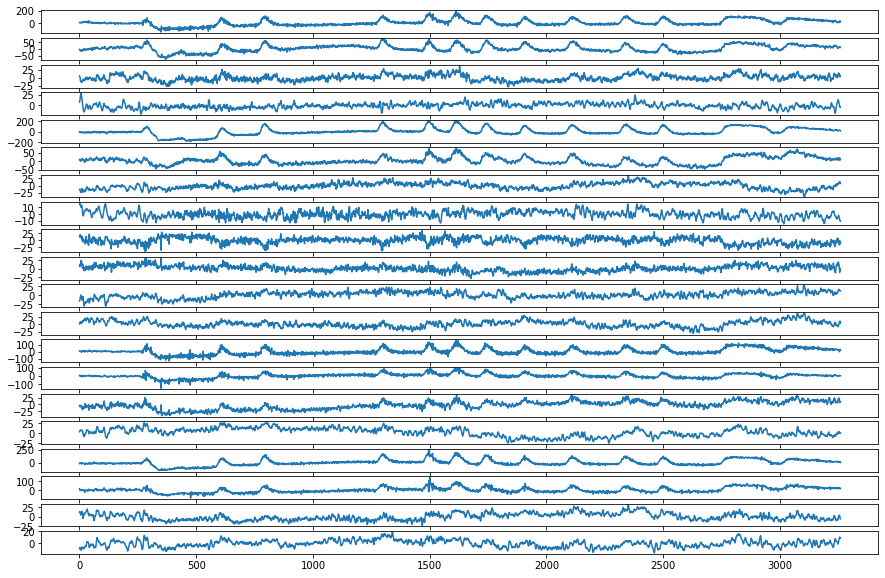

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot for sample eye movement data
fig, ax = plt.subplots(20, figsize=(15, 10))
for i in range(20):
    ax[i].plot(eyem_data[0].data[i])

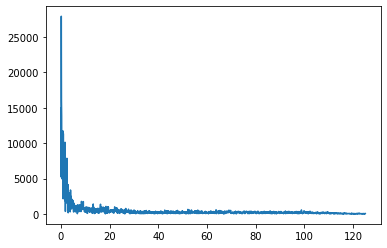

In [5]:
# Discrete Fourier transform using rfft function from scipy module
from scipy.fft import rfft, rfftfreq
import numpy as np

# Sampling frequency = 250 Hz
SAMPLE_FREQ = 250

# Fourier transform for sample eye movement data (channel=6)
x_dash = rfftfreq(len(eyem_data[0].data[5]), 1/SAMPLE_FREQ)
y_dash = rfft(eyem_data[0].data[5])
plt.plot(x_dash, np.abs(y_dash))

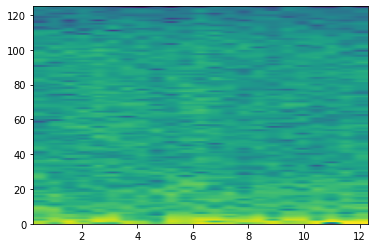

In [6]:
# Spectrogram for sample eye movement data (channel=6)
plt.specgram(eyem_data[0].data[5], Fs=SAMPLE_FREQ, noverlap=SAMPLE_FREQ/2)
plt.show()

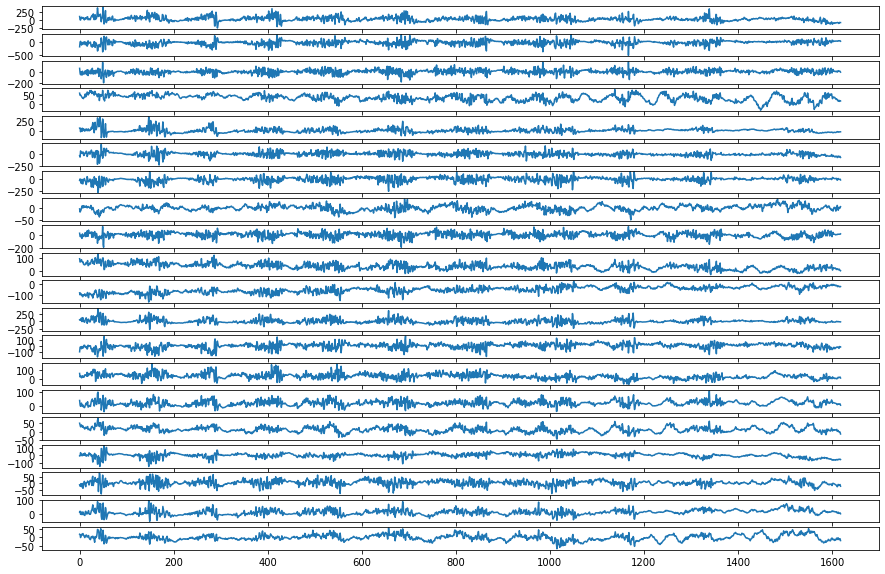

In [7]:
# Plot for sample chewing data
fig, ax = plt.subplots(20, figsize=(15, 10))
for i in range(20):
    ax[i].plot(chew_data[0].data[i])

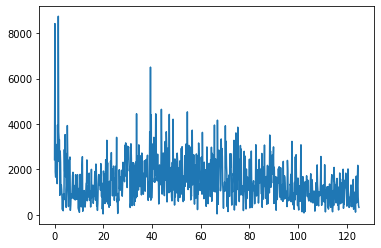

In [8]:
# Fourier transform for sample chewing data (channel=6)
x_dash = rfftfreq(len(chew_data[0].data[5]), 1/SAMPLE_FREQ)
y_dash = rfft(chew_data[0].data[5])
plt.plot(x_dash, np.abs(y_dash))

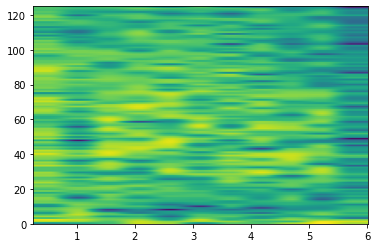

In [9]:
# Spectrogram for sample chewing data (channel=6)
plt.specgram(chew_data[0].data[5], Fs=SAMPLE_FREQ, noverlap=SAMPLE_FREQ/2)
plt.show()

In [10]:
# Euclidean distance
def eu_dist(a, b):
    return np.sqrt(np.abs(np.sum((a/len(a)))**2 - np.sum((b/len(b)))**2))        

In [11]:
# kNN classification
def kNN_classify(X_train, X_test, y_train):
    y_pred=[]
    for i in range(len(X_test)):
        dd=[]
        yy=[]
        for j in range(len(X_train)):
            d=eu_dist(X_train[j], X_test[i])
            dd.append(d)
            yy.append(y_train[j])
        df_temp=pd.DataFrame({'eu_dist':dd, 'class':yy})
        df_temp.sort_values('eu_dist')
        k=9
        c0, c1 = 0, 0
        for i2 in range(k):
            if df_temp['class'][i2]==0:
                c0+=1
            else:
                c1+=1
        if c0>c1:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [12]:
chew_data_fft = []
for i in range(len(chew_data)):
    temp=[]
    for j in range(20):
        channel_fft_temp = np.abs(rfft(chew_data[i].data[j]))
        channel_fft_temp = (channel_fft_temp - min(channel_fft_temp))/(max(channel_fft_temp) - min(channel_fft_temp))
        temp.append(channel_fft_temp)
    temp=np.array(temp).flatten()
    chew_data_fft.append(temp)
np.random.shuffle(chew_data_fft)

In [13]:
eyem_data_fft = []
for i in range(len(eyem_data)):
    temp=[]
    for j in range(20):
        channel_fft_temp = np.abs(rfft(eyem_data[i].data[j]))
        channel_fft_temp = (channel_fft_temp - min(channel_fft_temp))/(max(channel_fft_temp) - min(channel_fft_temp))
        temp.append(channel_fft_temp)
    temp=np.array(temp).flatten()
    eyem_data_fft.append(temp)
np.random.shuffle(eyem_data_fft)

In [14]:
import pandas as pd
df1=pd.DataFrame({'data':chew_data_fft, 'class':[0]*len(chew_data_fft)})
df2=pd.DataFrame({'data':chew_data_fft, 'class':[1]*len(chew_data_fft)})
df = pd.concat([df1,df2], ignore_index=1)

In [15]:
# Split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['data'], df['class'], test_size=0.3, random_state=42)

In [16]:
X_train = X_train.reset_index(drop=1)
X_test = X_test.reset_index(drop=1)
y_train = y_train.reset_index(drop=1)
y_test = y_test.reset_index(drop=1)

In [17]:
y_train

0      0
1      0
2      1
3      0
4      0
      ..
170    0
171    0
172    0
173    1
174    0
Name: class, Length: 175, dtype: int64

In [18]:
y_pred = kNN_classify(X_train, X_test, y_train)

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)